## Author basic information

### Inputs

- PAPERS_INFO/PROCESSED/JITS_AUTHORS
- PAPERS_INFO/PROCESSED/JIST_REGULAR

### Outputs
- PAPERS_INFO/PROCESSED/JITS_AUTHORS_PRO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from unidecode import unidecode
import re


In [2]:
authors_name = pd.read_csv('../utils/author_names.txt', sep="\t", header=None, names = ['from', 'to'])
authors_name.drop_duplicates(inplace = True)
name_changes = authors_name.set_index('from').to_dict(orient = 'index')

In [3]:
# jits
jits = pd.read_csv('../papers_info/processed/jits_authors.csv')[['paper_id', 'author_name', 'year', 'journal']]
jits['last_first'] = jits['author_name'].map(lambda x: x.split()[-1] + ", " + ' '.join(x.split()[:-1]))
jits['last_first_pro'] = jits.last_first.map(lambda x: unidecode(x))
jits.last_first_pro = jits.last_first_pro.map(lambda x: re.sub(r'\((.*?)\)', '', x))
jits.last_first_pro = jits.last_first_pro.map(lambda x: re.sub(r'\"(.*?)\"', '', x))
jits["last"] = jits.last_first_pro.map(lambda x: x.split(",")[0])
jits['first'] = jits.last_first_pro.map(lambda x: x.split(",")[1])
jits['first'] = jits['first'].str.replace("-", '').str.title()
jits.last_first_pro = jits['last'] + "," + jits['first']
tits.last_first_pro = tits.last_first_pro.str.replace("\. ", ".").str.strip()
jits.last_first_pro = jits.last_first_pro.map(lambda x: name_changes[x]['to'] if x in name_changes else x)
# regular paper
jits_reg = pd.read_csv('../papers_info/processed/jits_regular.csv')[['paper_id']]
jits = jits.merge(jits_reg, on = 'paper_id')
jits = jits[['paper_id', 'last_first_pro', 'year', 'journal']]
jits.drop_duplicates(inplace = True)


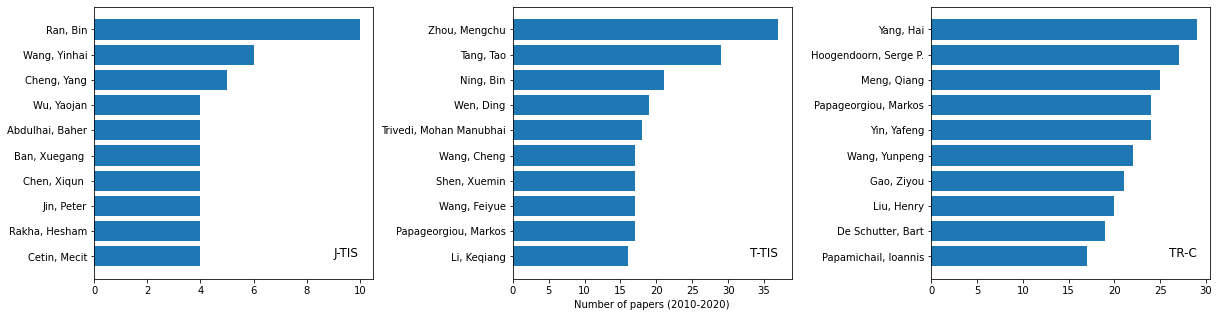

In [4]:
plt.figure(figsize = (8,5))

plt.subplot(131)
jits_top_authors = jits.groupby('last_first_pro').count().reset_index().sort_values(by = 'paper_id').tail(10)
plt.barh(jits_top_authors.last_first_pro.values, jits_top_authors.paper_id.values)
plt.text(9, 0, 'J-TIS', fontsize = 12)

plt.show()

In [5]:
trc_author_paper = trc.groupby('paper_id').count().reset_index().last_first_pro.mean()
jits_author_paper = jits.groupby('paper_id').count().reset_index().last_first_pro.mean()
tits_author_paper = tits.groupby('paper_id').count().reset_index().last_first_pro.mean()

trc_paper_author = trc.groupby('last_first_pro').count().reset_index().paper_id.mean()
jits_paper_author = jits.groupby('last_first_pro').count().reset_index().paper_id.mean()
tits_paper_author = tits.groupby('last_first_pro').count().reset_index().paper_id.mean()

print("Number of papers TR-C: %d, number of unique authors: %d, paper-author ratio: %.2f, average authors per paper: %.2f" % (len(trc.paper_id.unique()), len(trc.last_first_pro.unique()), trc_paper_author, trc_author_paper))
print("Number of papers J-ITS: %d, number of unique authors: %d, paper-author ratio: %.2f, average authors per paper: %.2f" % (len(jits.paper_id.unique()), len(jits.last_first_pro.unique()), jits_paper_author, jits_author_paper))
print("Number of papers T-ITS: %d, number of unique authors: %d, paper-author ratio: %.2f, average authors per paper: %.2f" % (len(tits.paper_id.unique()), len(tits.last_first_pro.unique()), tits_paper_author, tits_author_paper))

Number of papers TR-C: 2029, number of unique authors: 4367, paper-author ratio: 1.61, average authors per paper: 3.46
Number of papers J-ITS: 306, number of unique authors: 870, paper-author ratio: 1.21, average authors per paper: 3.43
Number of papers T-ITS: 2706, number of unique authors: 7055, paper-author ratio: 1.49, average authors per paper: 3.89


In [6]:
authors = pd.concat([jits, tits, trc])
authors['last_first_pro'] = authors.last_first_pro.str.replace("\. ", ".").str.strip()

authors.to_csv('../papers_info/processed/jits_authors_pro.csv', index = False)